In [11]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import numpy as np
import os
from anode.conv_models import ConvODENet
from anode.discrete_models import ResNet
from anode.training import Trainer
from experiments.dataloaders import mnist, tiny_imagenet
from viz.plots import histories_plt

classes = ('0','1', '2', '3', '4',
           '5', '6', '7', '8', '9')

data_loader, test_loader = mnist(256)


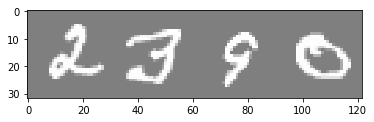

2 3 9 0


In [14]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms

# functions to show an image
img_size = (1, 28, 28)
output_dim = 10

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(data_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[0:4, :,:]))
# print labels
print(' '.join ('%s' % classes[labels[j]] for j in range(4)) )

# The Source code of anode

In [15]:
model = ConvODENet(device, img_size, num_filters=64, output_dim=10,
                                   augment_dim=5,
                                   time_dependent=True,
                                   non_linearity="relu",
                                   adjoint=True)

model.to(device)

optimizer = torch.optim.Adam(model.parameters(),lr=1e-3,weight_decay=0.0)

trainer = Trainer(model, optimizer, device,
          classification=True,
          print_freq=10,
          record_freq=10,
          verbose=True,
         )
trainer.train(data_loader, test_input=images[0:64, :,:],test_target=labels[0:64],num_epochs=5)


Iteration 0/235
Loss: 2.312
NFE: 20
BNFE: 21
Total NFE: 41

Iteration 10/235
Loss: 1.597
NFE: 20
BNFE: 21
Total NFE: 41

Iteration 20/235
Loss: 0.533
NFE: 20
BNFE: 21
Total NFE: 41

Iteration 30/235
Loss: 0.435
NFE: 20
BNFE: 21
Total NFE: 41

Iteration 40/235
Loss: 0.477
NFE: 20
BNFE: 21
Total NFE: 41

Iteration 50/235
Loss: 0.416
NFE: 20
BNFE: 21
Total NFE: 41

Iteration 60/235
Loss: 0.364
NFE: 20
BNFE: 33
Total NFE: 53

Iteration 70/235
Loss: 0.306
NFE: 20
BNFE: 21
Total NFE: 41

Iteration 80/235
Loss: 0.292
NFE: 20
BNFE: 21
Total NFE: 41

Iteration 90/235
Loss: 0.384
NFE: 20
BNFE: 21
Total NFE: 41

Iteration 100/235
Loss: 0.350
NFE: 20
BNFE: 21
Total NFE: 41

Iteration 110/235
Loss: 0.353
NFE: 20
BNFE: 21
Total NFE: 41

Iteration 120/235
Loss: 0.287
NFE: 20
BNFE: 21
Total NFE: 41

Iteration 130/235
Loss: 0.320
NFE: 20
BNFE: 21
Total NFE: 41

Iteration 140/235
Loss: 0.243
NFE: 20
BNFE: 21
Total NFE: 41

Iteration 150/235
Loss: 0.339
NFE: 20
BNFE: 21
Total NFE: 41

Iteration 160/235


In [19]:
if os.path.exists('./model')==False:
    os.mkdir('./model')
torch.save(model, './model/anode_model')


In [20]:
model = torch.load('./model/anode_model')
model.eval()


ConvODENet(
  (odeblock): ODEBlock(
    (odefunc): ConvODEFunc(
      (conv1): Conv2dTime(7, 64, kernel_size=(1, 1), stride=(1, 1))
      (conv2): Conv2dTime(65, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv3): Conv2dTime(65, 6, kernel_size=(1, 1), stride=(1, 1))
      (non_linearity): ReLU(inplace)
    )
  )
  (linear_layer): Linear(in_features=4704, out_features=10, bias=True)
)

In [21]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 97 %


# Hamiltonian

In [5]:
from hamiltonianNN.conv_models import ConvHamilNet,ResNet
from hamiltonianNN.training import Trainer


In [7]:
model = ConvHamilNet(device, img_size, num_filters=64,hidden_dim=128, output_dim=10,
                                   augment_dim=0,
                                   non_linearity="relu",discret=True,num_layers=100,final_time=5)

model.to(device)

optimizer = torch.optim.Adam(model.parameters(),lr=1e-3,weight_decay=0.0)

trainer = Trainer(model, optimizer, device,
          classification=True,
          print_freq=10,
          record_freq=10,
          verbose=True,
         )
trainer.train(data_loader, test_input=images[0:2, :,:],test_target=labels[0:2],num_epochs=10)


Iteration 0/235
Loss: 2.308


KeyboardInterrupt: 

In [8]:
model2 = ConvHamilNet(device, img_size, num_filters=64,hidden_dim=128, output_dim=10,augment_dim=0,
                                   non_linearity="relu",adjoint=True,level=7, method='leapfrog', discret=False)

model2.to(device)

optimizer2 = torch.optim.Adam(model2.parameters(),lr=1e-3,weight_decay=0.0)

trainer2 = Trainer(model2, optimizer2, device,
          classification=True,
          print_freq=10,
          record_freq=10,
          verbose=True,
         )
trainer2.train(data_loader, test_input=images[0:2, :,:],test_target=labels[0:2],num_epochs=10)

/Users/pingguo/WTF/Plus/DeepLearning/intership/ENSIIE_Intership/Hamilton_Network/torchdiffeq/_impl/misc.py:81: UserWarning: Leapfrog: Unexpected arguments {'max_num_steps': 1000}
  warnings.warn('{}: Unexpected arguments {}'.format(solver.__class__.__name__, unused_kwargs))



Iteration 0/235
Loss: 2.321
NFE: 2
BNFE: 0
Total NFE: 2


KeyboardInterrupt: 

In [ ]:
res_model = ResNet(device, img_size, num_filters=64, output_dim=10,num_layers=6,
                                   non_linearity="relu")
res_model.to(device)

res_optimizer = torch.optim.Adam(res_model.parameters(),lr=1e-3,weight_decay=0.0)

trainer = Trainer(res_model, res_optimizer, device,
          classification=True,
          print_freq=10,
          record_freq=10,
          verbose=True,
         )
trainer.train(data_loader, test_input=images[0:64, :,:],test_target=labels[0:64],num_epochs=5)

In [9]:
#torch.save(model2, './model/hamil_discret_model')

In [26]:

model = torch.load('./model/hamil_discret_model')  
accuracy(test_loader,model)

model = torch.load('./model/hamil_model')  
accuracy(test_loader,model)

model = torch.load('./model/resnet_model')  
accuracy(test_loader,model)

Accuracy of the network on the 10000 test images: 98.700000 %
Accuracy of the network on the 10000 test images: 98.270000 %
Accuracy of the network on the 10000 test images: 98.870000 %


In [10]:
model = torch.load('./model/hamil_model') 
def get_parameter_number(net):
    total_num = sum(p.numel() for p in net.parameters())
    trainable_num = sum(p.numel() for p in net.parameters() if p.requires_grad)
    return {'Total': total_num, 'Trainable': trainable_num}
get_parameter_number(model)

{'Total': 146207, 'Trainable': 146207}

In [13]:
parm={}
for name,parameters in model.named_parameters():
    print(name,':',parameters.size())
#parm[name]=parameters.detach().numpy()

hamilnet.hamil_blocks.0.mlp.0.weight : torch.Size([128, 64])
hamilnet.hamil_blocks.0.mlp.0.bias : torch.Size([128])
hamilnet.hamil_blocks.0.vts.weight : torch.Size([64, 64])
hamilnet.hamil_blocks.1.mlp.0.weight : torch.Size([128, 64])
hamilnet.hamil_blocks.1.mlp.0.bias : torch.Size([128])
hamilnet.hamil_blocks.1.vts.weight : torch.Size([64, 64])
hamilnet.hamil_blocks.2.mlp.0.weight : torch.Size([128, 64])
hamilnet.hamil_blocks.2.mlp.0.bias : torch.Size([128])
hamilnet.hamil_blocks.2.vts.weight : torch.Size([64, 64])
hamilnet.hamil_blocks.3.mlp.0.weight : torch.Size([128, 64])
hamilnet.hamil_blocks.3.mlp.0.bias : torch.Size([128])
hamilnet.hamil_blocks.3.vts.weight : torch.Size([64, 64])
hamilnet.hamil_blocks.4.mlp.0.weight : torch.Size([128, 64])
hamilnet.hamil_blocks.4.mlp.0.bias : torch.Size([128])
hamilnet.hamil_blocks.4.vts.weight : torch.Size([64, 64])
hamilnet.hamil_blocks.5.mlp.0.weight : torch.Size([128, 64])
hamilnet.hamil_blocks.5.mlp.0.bias : torch.Size([128])
hamilnet.hamil

In [12]:
model = torch.load('./model/hamil_discret_model')  
get_parameter_number(model)

{'Total': 1375114, 'Trainable': 1375114}

In [9]:
model = torch.load('./model/resnet_model') 
get_parameter_number(model)

{'Total': 602506, 'Trainable': 602506}

In [1]:
import torch
from hamiltonianNN.conv_models import ConvHamilNet,ResNet,Flatten,ResBlock
from hamiltonianNN.training import Trainer
model = torch.load('./model/hamil_model')
model.eval()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/torch/serialization.py:454: SourceChangeWarning: source code of class 'hamiltonianNN.models.HODENet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/torch/serialization.py:454: SourceChangeWarning: source code of class 'hamiltonianNN.models.ODEFuncH3' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


ConvHamilNet(
  (hamilnet): HODENet(
    (odeblock): HODEBlock(
      (odefunc): ODEFuncH3(
        (fc1): Linear(in_features=65, out_features=128, bias=True)
        (fc2): Linear(in_features=65, out_features=65, bias=False)
        (non_linearity1): ReLU(inplace)
      )
    )
    (linear_layer): Linear(in_features=130, out_features=10, bias=True)
  )
  (odeblock): HODEBlock(
    (odefunc): ODEFuncH3(
      (fc1): Linear(in_features=65, out_features=128, bias=True)
      (fc2): Linear(in_features=65, out_features=65, bias=False)
      (non_linearity1): ReLU(inplace)
    )
  )
  (net): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): GroupNorm(32, 64, eps=1e-05, affine=True)
    (2): ReLU(inplace)
    (3): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (4): GroupNorm(32, 64, eps=1e-05, affine=True)
    (5): ReLU(inplace)
    (6): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): GroupNorm(32, 64, eps=1e-05, 